# **IPO Market Analysis & Insights Report**

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

file_path =  os.path.join("data", "IPO_listings.xlsx")
df = pd.read_excel(file_path)

df.head()

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Total,Offer Price,List Price,Listing Gain,CMP(BSE),CMP(NSE),Current Gains
0,2025-08-06,M & B Engineering Ltd,650.00,36.72,38.24,32.55,36.20,385,386.0,0.26,426.85,426.15,10.87
1,2025-08-06,Sri Lotus Developers & Realty Ltd,792.00,163.90,57.71,20.28,69.14,150,179.1,19.40,201.10,199.72,34.07
2,2025-08-06,National Securities Depository Ltd (NSDL),4011.60,103.97,34.98,7.73,41.01,800,880.0,10.00,1294.05,61.76,NaN
3,2025-08-05,Aditya Infotech Ltd,1300.00,133.21,72.00,50.87,100.69,675,1018.0,50.81,1064.60,1062.70,57.72
4,2025-08-05,Laxmi India Finance Ltd,254.26,1.30,1.84,2.22,1.87,158,136.0,-13.92,149.00,150.00,-5.70


In [81]:
print ("Rows and Columns:",df.shape)

print ("\n datatype:")
print (df.dtypes)

print ("\n missing values per columns:")
print (df.isnull().sum())

df.info()

Rows and Columns: (561, 13)

 datatype:
Date                  datetime64[ns]
IPO_Name                      object
Issue_Size(crores)           float64
QIB                          float64
HNI                          float64
RII                          float64
Total                        float64
Offer Price                    int64
List Price                   float64
Listing Gain                 float64
CMP(BSE)                     float64
CMP(NSE)                     float64
Current Gains                float64
dtype: object

 missing values per columns:
Date                   0
IPO_Name               0
Issue_Size(crores)     0
QIB                    2
HNI                    2
RII                    2
Total                  2
Offer Price            0
List Price             0
Listing Gain           0
CMP(BSE)               2
CMP(NSE)              10
Current Gains          3
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 13 co

In [82]:
print ("Duplicated Rows:", df.duplicated().sum())

df.head(10)

Duplicated Rows: 0


,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Total,Offer Price,List Price,Listing Gain,CMP(BSE),CMP(NSE),Current Gains
0,2025-08-06,M & B Engineering Ltd,650.00,36.72,38.24,32.55,36.20,385,386.0,0.26,426.85,426.15,10.87
1,2025-08-06,Sri Lotus Developers & Realty Ltd,792.00,163.90,57.71,20.28,69.14,150,179.1,19.40,201.10,199.72,34.07
2,2025-08-06,National Securities Depository Ltd (NSDL),4011.60,103.97,34.98,7.73,41.01,800,880.0,10.00,1294.05,61.76,NaN
3,2025-08-05,Aditya Infotech Ltd,1300.00,133.21,72.00,50.87,100.69,675,1018.0,50.81,1064.60,1062.70,57.72
4,2025-08-05,Laxmi India Finance Ltd,254.26,1.30,1.84,2.22,1.87,158,136.0,-13.92,149.00,150.00,-5.70
5,2025-08-01,Shanti Gold International Ltd,360.11,117.33,151.48,30.37,81.17,199,229.1,15.13,254.00,255.90,27.64
6,2025-07-31,Brigade Hotel Ventures Limited,759.60,5.42,1.92,6.40,4.48,90,82.0,-8.89,85.95,86.00,-4.50
7,2025-07-30,GNG Electronics Limited,460.44,266.21,227.67,46.84,147.93,237,350.0,47.68,321.20,321.95,35.53
8,2025-07-30,Indiqube Spaces Limited,700.00,14.35,8.27,12.90,12.41,237,218.7,-7.72,216.30,216.33,-8.73
9,2025-07-21,Anthem Biosciences Limited,3395.00,182.65,42.36,5.64,63.86,570,723.1,26.86,753.15,754.80,32.13


## Data cleaning and preparation 

In [83]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include= ['object']).columns

print ("Numerical columns:", num_cols)
print ("\n categorial columns:", cat_cols)

Numerical columns: Index(['Issue_Size(crores)', 'QIB', 'HNI', 'RII', 'Total', 'Offer Price',
       'List Price', 'Listing Gain', 'CMP(BSE)', 'CMP(NSE)', 'Current Gains'],
      dtype='object')

 categorial columns: Index(['IPO_Name'], dtype='object')


In [84]:
df.drop_duplicates(inplace=True)

print (df.isnull().sum())


Date                   0
IPO_Name               0
Issue_Size(crores)     0
QIB                    2
HNI                    2
RII                    2
Total                  2
Offer Price            0
List Price             0
Listing Gain           0
CMP(BSE)               2
CMP(NSE)              10
Current Gains          3
dtype: int64


In [85]:
numeric_cols = [
    'Issue_Size(crores)', 'QIB', 'HNI', 'RII', 'Total', 'Offer Price',
       'List Price', 'Listing Gain', 'CMP(BSE)', 'CMP(NSE)', 'Current Gains'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [86]:
df.dtypes

Date                  datetime64[ns]
IPO_Name                      object
Issue_Size(crores)           float64
QIB                          float64
HNI                          float64
RII                          float64
Total                        float64
Offer Price                    int64
List Price                   float64
Listing Gain                 float64
CMP(BSE)                     float64
CMP(NSE)                     float64
Current Gains                float64
dtype: object

In [87]:
df.isnull().sum

df['Listing Gain'] = df ['Listing Gain'].fillna(0)
df['Current Gains'] = df['Current Gains'].fillna(0)
df['CMP(BSE)'] = df ['CMP(BSE)'].fillna(df['CMP(BSE)'].median())
df['CMP(NSE)'] = df['CMP(NSE)'].fillna(df['CMP(NSE)'].median())

In [88]:
df.drop_duplicates(inplace=True)

In [104]:
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
print(df)

          Date                                   IPO_Name  Issue_Size(crores)  \
0   2025-08-06                      M & B Engineering Ltd              650.00   
1   2025-08-06          Sri Lotus Developers & Realty Ltd              792.00   
2   2025-08-06  National Securities Depository Ltd (NSDL)             4011.60   
3   2025-08-05                        Aditya Infotech Ltd             1300.00   
4   2025-08-05                    Laxmi India Finance Ltd              254.26   
..         ...                                        ...                 ...   
556 2010-02-03        Infinite Computer Solutions Limited              189.80   
557 2010-01-06                           D B Corp Limited              384.22   
558 2010-01-05                  Godrej Properties Limited              468.85   
559 2010-01-04                         JSW Energy Limited             2700.00   
560 2010-01-11                 MBL Infrastructure Limited              102.60   

        QIB     HNI    RII 

In [89]:
 #feature Engineering 
df['calculated_gain_%'] = ((df['List Price'] - df['Offer Price']) / df['Offer Price']) * 100

def subscription_category (x):
    if x < 5:
        return 'Low'
    elif x < 20:
        return 'Medium'
    else:
        return 'High'

df['subscription_category'] = df ['Total'].apply(subscription_category)

In [90]:
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())
df.head()

(561, 15)
Date                     datetime64[ns]
IPO_Name                         object
Issue_Size(crores)              float64
QIB                             float64
HNI                             float64
RII                             float64
Total                           float64
Offer Price                       int64
List Price                      float64
Listing Gain                    float64
CMP(BSE)                        float64
CMP(NSE)                        float64
Current Gains                   float64
calculated_gain_%               float64
subscription_category            object
dtype: object
Date                     0
IPO_Name                 0
Issue_Size(crores)       0
QIB                      2
HNI                      2
RII                      2
Total                    2
Offer Price              0
List Price               0
Listing Gain             0
CMP(BSE)                 0
CMP(NSE)                 0
Current Gains            0
calculated_gain_%        

,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Total,Offer Price,List Price,Listing Gain,CMP(BSE),CMP(NSE),Current Gains,calculated_gain_%,subscription_category
0,2025-08-06,M & B Engineering Ltd,650.00,36.72,38.24,32.55,36.20,385,386.0,0.26,426.85,426.15,10.87,0.259740,High
1,2025-08-06,Sri Lotus Developers & Realty Ltd,792.00,163.90,57.71,20.28,69.14,150,179.1,19.40,201.10,199.72,34.07,19.400000,High
2,2025-08-06,National Securities Depository Ltd (NSDL),4011.60,103.97,34.98,7.73,41.01,800,880.0,10.00,1294.05,61.76,0.00,10.000000,High
3,2025-08-05,Aditya Infotech Ltd,1300.00,133.21,72.00,50.87,100.69,675,1018.0,50.81,1064.60,1062.70,57.72,50.814815,High
4,2025-08-05,Laxmi India Finance Ltd,254.26,1.30,1.84,2.22,1.87,158,136.0,-13.92,149.00,150.00,-5.70,-13.924051,Low


## 📊Exploratory Data Analysis

#### Let's explore the trends, patterns, and relationship in IPO using EDA  

In [91]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,561,2019-02-28 23:00:57.754010880,2010-01-04 00:00:00,2015-05-26 00:00:00,2021-02-05 00:00:00,2023-11-07 00:00:00,2025-08-06 00:00:00,NaN
Issue_Size(crores),561.0,1411.483957,23.0,251.19,592.0,1237.51,27858.8,2642.439572
QIB,559.0,47.477013,0.0,2.35,13.72,76.255,331.6,63.325282
HNI,559.0,74.686834,0.0,1.71,13.2,81.11,958.07,136.785773
RII,559.0,15.972165,0.0,1.6,5.12,13.75,374.81,33.155961
Total,559.0,37.568891,0.11,2.245,11.52,55.07,326.49,53.804193
Offer Price,561.0,362.187166,10.0,126.0,258.0,493.0,2150.0,325.28259
List Price,561.0,430.38148,9.5,138.0,293.0,585.15,2725.0,416.667277
Listing Gain,561.0,18.029554,-31.73,-0.01,7.15,26.13,252.76,31.924815
CMP(BSE),561.0,672.483904,0.04,119.9,298.35,741.9,15924.1,1209.186797


- This table describes the statistical Value of each Numerical valued columns.

In [92]:
df.describe(include='object').T

,count,unique,top,freq
IPO_Name,561,560,Power Grid Corporation of India Ltd,2
subscription_category,561,3,High,236


- This helps us to know the Overall data patterns like Mean, Median, Min, Max, Dominant Catrgories

#### Distribution of the IPO Listing Gains

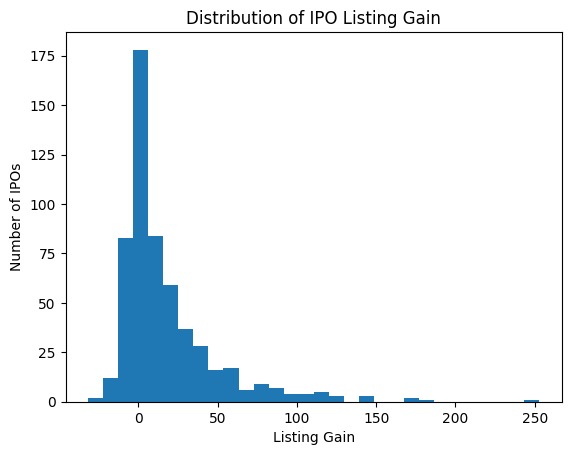

In [3]:
plt.hist(df['Listing Gain'], bins=30)
plt.title("Distribution of IPO Listing Gain")
plt.xlabel("Listing Gain")
plt.ylabel("Number of IPOs")
plt.show()

#### IPOs issue sizes describing through Boxplot

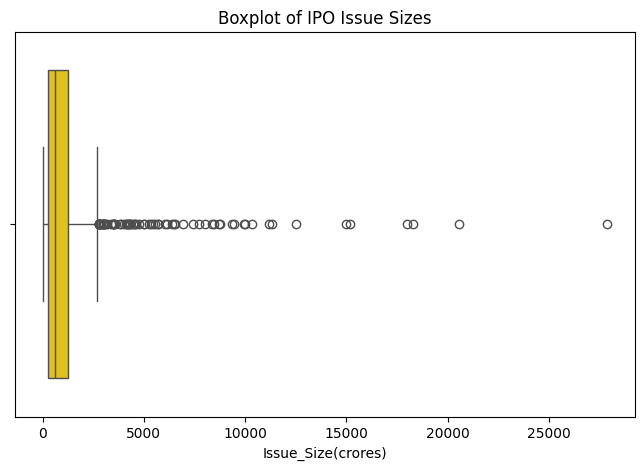

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Issue_Size(crores)'], color='gold')
plt.title('Boxplot of IPO Issue Sizes')
plt.xlabel('Issue_Size(crores)')
plt.show()

#### Issue Size by the company and the Listing Gain when the IPO is listed

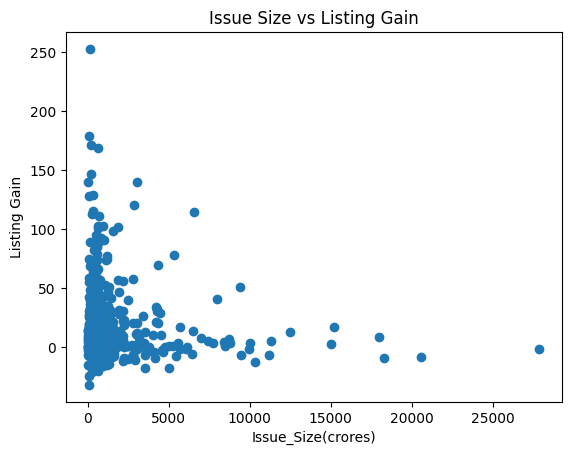

In [4]:
plt.scatter(df['Issue_Size(crores)'], df['Listing Gain'])
plt.title("Issue Size vs Listing Gain")
plt.xlabel("Issue_Size(crores)")
plt.ylabel("Listing Gain")
plt.show()

#### **IPOs** Listed each Years and Listing Gains upon the subscription categories 

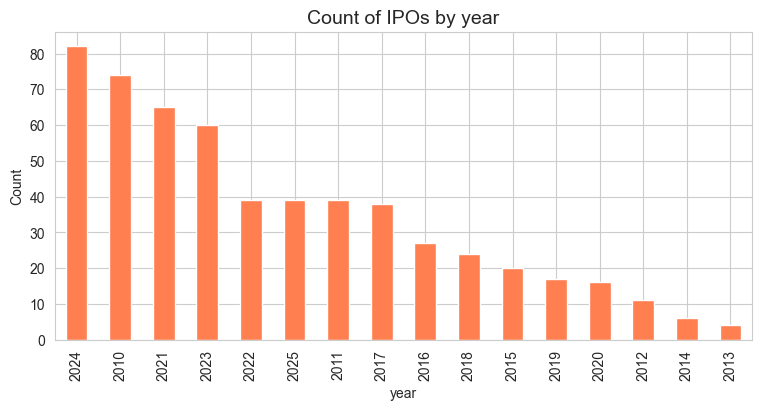

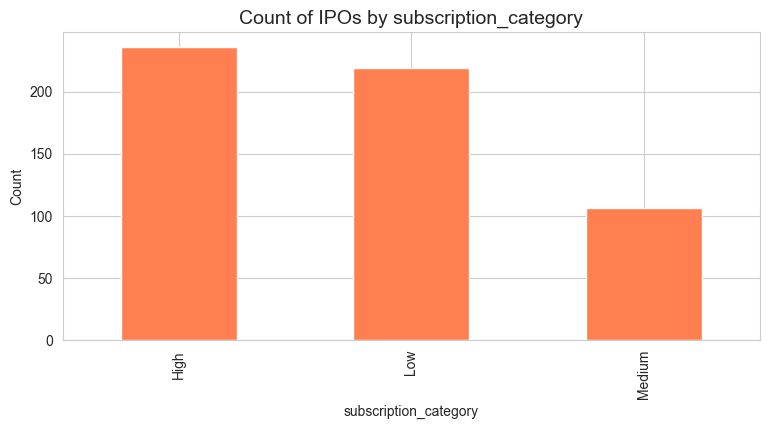

In [106]:
cat_cols = ['year', 'subscription_category']

for col in cat_cols:
    plt.figure(figsize=(9,4))
    df[col].value_counts().sort_values(ascending=False).plot(kind='bar', color='coral')
    plt.title(f'Count of IPOs by {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

- As you can see in the first Chart how the IPOs are listing where increasing Year by Year.
- Almost about more then 200+ where Highly subscripted in the subscription Category 

#### Listing Gains over the Years

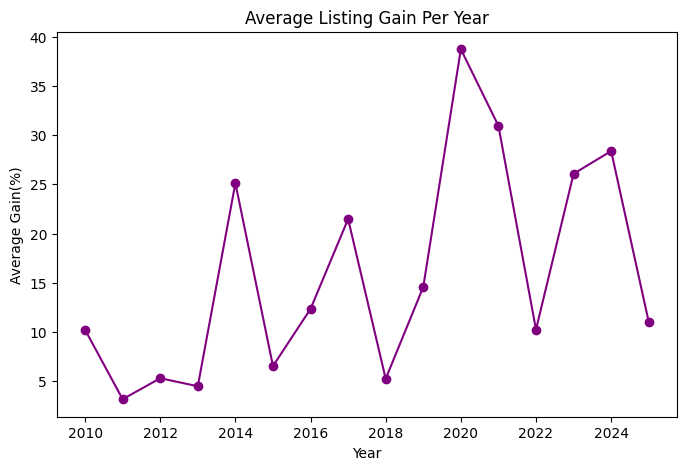

In [13]:
yearly_gain = df.groupby('Year')['Listing Gain'].mean()
yearly_gain.plot(kind='line', marker='o', color='purple', figsize=(8,5))
plt.title('Average Listing Gain Per Year')
plt.xlabel('Year')
plt.ylabel('Average Gain(%)')
plt.show()

#### Correlation Between the Numerical Variables

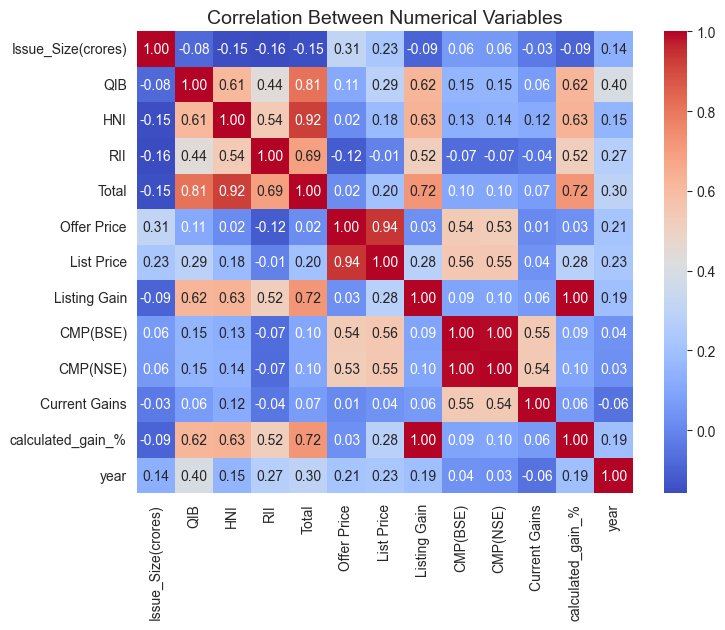

In [109]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numerical Variables', fontsize=14)
plt.show()

#### Subscription vs Listing Gain

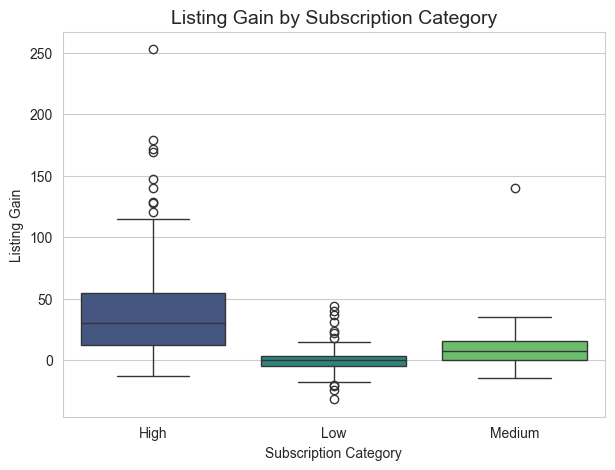

In [113]:
plt.figure(figsize=(7,5))
sns.boxplot(x='subscription_category', y='Listing Gain', data=df, hue='subscription_category', palette='viridis', legend=False)
plt.title('Listing Gain by Subscription Category', fontsize=14)
plt.xlabel('Subscription Category')
plt.ylabel('Listing Gain')
plt.show()

#### Categorizing the Listing Gain Using the feature Engineering 

In [14]:
def gain_category(x):
    if x < 0:
        return 'Loss'
    elif x < 10:
        return 'Moderate Gain'
    else:
        return 'High Gain'

df['Gain_category'] = df['Listing Gain'].apply(gain_category)
df['Gain_category'].value_counts()

Gain_category
High Gain        250
Moderate Gain    170
Loss             141
Name: count, dtype: int64

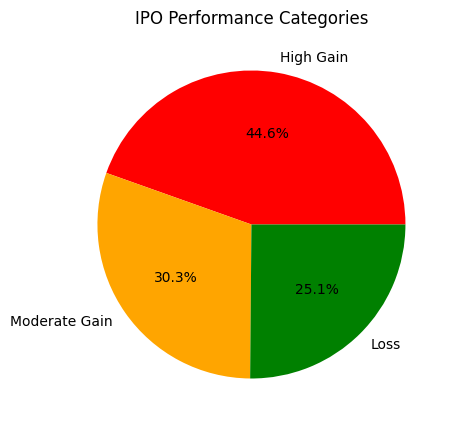

In [16]:
plt.figure(figsize=(7,5))
df['Gain_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['red', 'orange', 'green'])
plt.title('IPO Performance Categories')
plt.ylabel('')
plt.show()

### Top 10 and worst 10 IPOs

In [32]:
top10 = df.nlargest(10, 'Listing Gain')[['IPO_Name','Year' ,'Offer Price', 'List Price', 'Listing Gain' ]]
top10

,IPO_Name,Year,Offer Price,List Price,Listing Gain
238,Sigachi Industries Limited,2021,163,575.00,252.76
110,Vibhor Steel Tubes Limited,2024,151,421.00,178.81
242,Paras Defence and Space Technologies Limited,2021,175,475.00,171.43
233,Latent View Analytics,2021,197,530.00,169.04
45,Mamata Machinery Limited,2024,243,600.00,146.91
133,Tata Technologies Limited,2023,500,1199.95,139.99
364,Salasar Techno Engineering Ltd,2017,108,259.15,139.95
116,BLS E-Services Limited,2024,135,309.00,128.89
342,Astron Paper & Board Mill Ltd,2017,50,114.00,128.00
81,Premier Energies Limited,2024,450,991.00,120.22


In [31]:
worst10 = df.nsmallest(10, 'Listing Gain')[['IPO_Name','Year', 'Offer Price', 'List Price', 'Listing Gain' ]]
worst10

,IPO_Name,Year,Offer Price,List Price,Listing Gain
471,Vaswani Industries Ltd,2011,49,33.45,-31.73
333,Dharan Infra EPC Ltd,2018,180,136.00,-24.44
376,CL Educate Ltd,2017,502,398.00,-20.72
226,Shriram Properties Limited,2021,118,94.00,-20.34
248,Nuvoco Vistas Corporation Limited,2021,570,471.00,-17.37
329,ICICI Securities Ltd,2018,520,431.10,-17.10
335,Bharat Dynamics Ltd,2018,428,360.00,-15.89
415,Pennar Engineered Building Systems Ltd,2015,178,150.00,-15.73
317,Xelpmoc Design and Technologies Ltd,2019,66,56.00,-15.15
270,Kalyan Jewellers India Limited,2021,87,73.90,-15.06


## conclusions

#### After performing a Detailed Exploratory Data Analysis(EDA) on the IPO Listings, Several meaningful Insights were uncovered:

- The Number of IPOs were fluctuated signnificantly across years.
- Certaian years showed a clear boom in IPO activity, reflecting strong market sentiment and investor confidence.
- Almost about 44.6% IPOs provided the **High listing gains**, while 30.3% delivered **Moderate Listing Gains**.
- This highly indicates that not every IPO can be profitable but can provide with moderate gains.
- The **top 10 IPOs by listing Gains** reveals that smaller, niche companies sometimes outperform large then well-known ones.
- For investor, focusing on IPOs with high subscription levels and smaller issue size might yield better short-term returns.
- However, not all highly subscribed IPOs guarantee profit, emphasizing need for fundamental analysis.

#### key Takeaways
- The IPO market is **Cyclical**, driven by overall market conditions and investor decisions.
- **Demand of IPO** often predicts **Listing Success**, but fundamentals is the Key of any IPO.
- Visualization analysis provided data-backend insights that can guide investment decisions.

In [34]:
print("IPO Analysis Completed Successfully — Insights Generated and Visualization Complete!")


IPO Analysis Completed Successfully — Insights Generated and Visualization Complete!
